# **Preprocessing NLP - Tutoriel pour nettoyer rapidement un texte** - [voir l'article](https://inside-machinelearning.com/preprocessing-nlp-tutoriel-pour-nettoyer-rapidement-un-texte/)

Je vous propose aujourd'hui **un tutoriel de Preprocessing NLP** pour voir en détail **comment nettoyer des données textes !**
 
On va voir **plusieurs approches** qui seront adaptable autant aux **textes en anglais** qu'aux **textes en français**.
 
Ensuite, on verra comment **encoder ces données** en format compréhensible, **interprétable** par nos modèles de **Machine Learning et Deep Learning.**
 
**C'est parti !**

# **Preprocessing**

## **Charger les données**

**Premièrement**, comme à notre habitude, on va **charger nos données**.
 
Ici on prend un **fichier csv** tiré de [cette compétition Kaggle](https://www.kaggle.com/c/nlp-getting-started) contenant **plusieurs milliers de phrases en anglais.**
 
**Parfait pour nous ;)**

On charge les **phrases** depuis ce [répertoire Github](https://github.com/tkeldenich/NLP_Preprocessing).

In [ ]:
!git clone https://github.com/tkeldenich/NLP_Preprocessing.git &> /dev/null

Puis on **insère ces données** dans un **Dataframe Pandas**.

In [ ]:
import numpy as np
import pandas as pd

train_data = pd.read_csv('/content/NLP_Preprocessing/train.csv')

train_data.head()

,text
0,Forest fire near La Ronge Sask. Canada
1,All residents asked to 'shelter in place' are ...
2,"13,000 people receive #wildfires evacuation or..."
3,Just got sent this photo from Ruby #Alaska as ...
4,#RockyFire Update => California Hwy. 20 closed...


## **Nettoyer les données**

Une fois que les **données sont chargées** il faut les **nettoyer**, faire ce qu'on appelle un **preprocessing**.
 
**Dans la plupart des cas pour du NLP**, le preprocessing consiste à **enlever les caractères** qui ne sont pas des lettres comme "#", "-", "!", les **chiffres** ou bien encore **les mots qui n'ont pas de sens** ou qui ne font pas partie de la langue analysée.
 
**Garder en tête** cependant que pour certains **type de problèmes** il peut être intéressant de **préserver certains types de caractères.**
 
Par exemple : pour analyser **si un email est un spam ou non**, on peut imaginer que **les '!' sont un bon indicateur** et donc **ne pas les enlever lors du nettoyage.**

Nous allons ici **coder deux fonctions :**
- une pour **nettoyer nos phrases en langue anglaise**
- une pour **nettoyer nos phrases en langue française**
 
Ces deux fonctions ont, par ailleurs, **la même architecture.**

### **Texte en anglais**

Premièrement on **importe** toutes les **librairies nécessaires :**


In [ ]:
import nltk
import string
from nltk.stem import WordNetLemmatizer 

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

Ensuite on **initialise** :
- les **stopwords**, ce sont les mots qui apparaissent très fréquemment mais qui n'apporte pas de sens à la phrase (comme "de", "le", "une")
- les mots (**words**) qui proviennent d'un dictionnaire **anglais**
- un **lemmatizer**, cette objet nous permet de préserver la racine des mots de tel sorte que deux mots ayant une même souche seront considérés comme un seul et même mot (exemple : 'voisine' et 'voisinage' seront tous deux changer en 'voisin')

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
words = set(nltk.corpus.words.words())
lemmatizer = WordNetLemmatizer()

Puis on construit notre **fonction de preprocessing** qui va successivement :
- enlever la **ponctuation**
- enlever les **chiffres**
- transformer les phrases en **liste de tokens** (en liste de mots)
- enlever les **stopwords** (mots n'apportant pas de sens)
- **lemmatizer**
- enlever les **majuscules**
- **reformer les phrases** avec les mots restants

In [ ]:
def Preprocess_listofSentence(listofSentence):
    preprocess_list = []
    for sentence in listofSentence :
        
        sentence_w_punct = "".join([i.lower() for i in sentence if i not in string.punctuation])
        
        sentence_w_num = ''.join(i for i in sentence_w_punct if not i.isdigit())

        tokenize_sentence = nltk.tokenize.word_tokenize(sentence_w_num)
        
        words_w_stopwords = [i for i in tokenize_sentence if i not in stopwords]
        
        words_lemmatize = (lemmatizer.lemmatize(w) for w in words_w_stopwords)

        sentence_clean = ' '.join(w for w in words_lemmatize if w.lower() in words or not w.isalpha())
        
        preprocess_list.append(sentence_clean)
    
    return preprocess_list 

Puis on l'**utilise :**

In [ ]:
preprocess_list = Preprocess_listofSentence(train_data['text'])

Ensuite on peut **afficher** un exemple de **phrase nettoyée :**

In [ ]:
print('Phrase de base : '+train_data['text'][2])
print('Phrase nettoyer : '+preprocess_list[2])

Phrase de base : 13,000 people receive #wildfires evacuation orders in California 
Phrase nettoyer : people receive wildfire evacuation order


### **Texte en français**

Ici on va d'abord installer **la librairie** [FrenchLefffLemmatizer](https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer) qui permet d'effectuer une **lemmatization en français.**

In [ ]:
 !pip install git+https://github.com/ClaudeCoulombe/FrenchLefffLemmatizer.git &> /dev/null

On **importe** ensuite les librairies.

In [ ]:
import nltk
import string
from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer
 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Ensuite on **initialise** :
- les **stopwords**, ce sont les mots qui apparaissent très fréquemment mais qui n'apporte pas de sens à la phrase (comme "de", "le", "une")
- les **mots** qui proviennent d'un dictionnaire **français**
- un **lemmatizer**, cette objet nous permet de préserver la racine des mots de tel sorte que deux mots ayant une même souche seront considérés comme un même mot (exemple : 'voisine' et 'voisinage' seront tous deux changer en 'voisin')

In [ ]:
french_stopwords = nltk.corpus.stopwords.words('french')
mots = set(line.strip() for line in open('/content/NLP_Preprocessing/dictionnaire.txt'))
lemmatizer = FrenchLefffLemmatizer()

Puis on construit notre fonction de preprocessing qui va successivement :
- enlever la **ponctuation**
- enlever les **chiffres**
- transformer les phrases en **liste de tokens** (en liste de mots)
- enlever les **stopwords** (mots n'apportant pas de sens)
- **lemmatizer**
- garder seulement **les mots présent dans le dictionnaire**
- enlever les **majuscules**
- **reformer les phrases** avec les mots restant

In [ ]:
def French_Preprocess_listofSentence(listofSentence):
  preprocess_list = []
  for sentence in listofSentence :
        
    sentence_w_punct = "".join([i.lower() for i in sentence if i not in string.punctuation])
        
    sentence_w_num = ''.join(i for i in sentence_w_punct if not i.isdigit())
 
    tokenize_sentence = nltk.tokenize.word_tokenize(sentence_w_num)
        
    words_w_stopwords = [i for i in tokenize_sentence if i not in french_stopwords]
        
    words_lemmatize = (lemmatizer.lemmatize(w) for w in words_w_stopwords)
 
    sentence_clean = ' '.join(w for w in words_lemmatize if w.lower() in mots or not w.isalpha())
        
    preprocess_list.append(sentence_clean)
    
  return preprocess_list

On crée des données pour **tester notre fonction :**

In [ ]:
lst = ['C\'est un test pour lemmatizer',
       'plusieurs phrases pour un nettoyage',
       'eh voilà la troisième !']
french_text = pd.DataFrame(lst, columns =['text'])

Ensuite on l'**utilise :**

In [ ]:
french_preprocess_list = French_Preprocess_listofSentence(french_text['text'])

Et on **regarde le résultat :**

In [ ]:
print('Phrase de base : '+lst[1])
print('Phrase nettoyer : '+french_preprocess_list[1])

Phrase de base : plusieurs phrases pour un nettoyage
Phrase nettoyer : plusieurs phrase nettoyage


# **Les différents encodages**

Une fois qu'on a **extrait les informations utiles** de nos phrases, on peut passer à **la phase d'encodage.**
 
L'encodage est une **étape essentielle** pour pouvoir faire du **Machine Learning.**
 
En effet, il permet de **transformer les données texte en chiffres** que la machine peut interprérer, **que la machine peut comprendre**.
 
Il existe **différents types d'encodage** et nous allons dès maintenant aborder **les plus connus !**

## **One-Hot Encoding**

Le **One-Hot Encoding** est à la fois **la méthode la plus connu**, la **plus simple à réaliser**, et celle qui m'a permis d'avoir **la meilleure précision** dans la plupart de **mes travaux personnels en NLP.**
 
Le One-Hot consite à **créer un dictionnaire** avec **tous les mots qui apparaissent** dans nos phrases nettoyées.
 
Ce dictionnaire est en fait **un tableau** où **chaque colonne représente un mot** et **chaque ligne représente une phrase**.
 
Si **tel mot apparaît dans tel phrase**, on met une **valeur de 1** dans l'élément du tableau, **sinon** on met une **valeur de 0.**
 
On aura donc un **tableau composé uniquement de 0 et de 1**.

Pour réaliser le **One-Hot Encoding** en **Python**, on initialise le **dictionnaire** avec la fonction *CountVectorizer()* de la librairie *Sklearn*.
 
Puis on utilise la **fonction** *fit_transform()* sur **nos données preprocessées.**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
 
vectorizer = CountVectorizer()
 
X = vectorizer.fit_transform(preprocess_list)

In [ ]:
X.toarray()[0]

array([0, 0, 0, ..., 0, 0, 0])

En fait la **classe** *vectorizer* garde beaucoup d'autres **informations sur le dictionnaire.**
 
En outre, si nous voulons **encoder de nouvelles phrases** pour utiliser notre **modèle de Machine Learning entraîné** il faudra utiliser la **fonction** *fit()* de la **classe** *vectorizer*.
 
On peut ainsi **adapter ces nouvelles phrases à notre dictionnaire.** Cela implique néanmoins que si ces nouvelles phrases contiennent **un mot qui n'est pas dans le dictionnaire**, il ne sera **pas pris en compte.**
 
On peut voir **les mots composants ce dictionnaire** avec la **fonction**  *get_feature_names()* de *vectorizer*.

In [ ]:
vectorizer.get_feature_names()

['aa',
 'aal',
 'aba',
 'abandon',
 'abandoned',
 'ability',
 'abject',
 'ablaze',
 'able',
 'aboard',
 'abomination',
 'abortion',
 'abouts',
 'absence',
 'absolute',
 'absolutely',
 'abstract',
 'absurd',
 'absurdly',
 'abuse',
 'accept',
 'access',
 'accident',
 'accidentally',
 'accidently',
 'accidents',
 'according',
 'accordingly',
 'account',
 'accountable',
 'accuracy',
 'accused',
 'accustomed',
 'ace',
 'achieve',
 'achievement',
 'aching',
 'acid',
 'acids',
 'acne',
 'acoustic',
 'acquiesce',
 'acquire',
 'acquired',
 'acquisition',
 'acre',
 'acronym',
 'across',
 'acrylic',
 'act',
 'actin',
 'acting',
 'action',
 'activate',
 'active',
 'actively',
 'activist',
 'activity',
 'actor',
 'actress',
 'actual',
 'actually',
 'acute',
 'ad',
 'adaptation',
 'add',
 'added',
 'addict',
 'addiction',
 'addition',
 'address',
 'adjust',
 'adjustable',
 'adjuster',
 'administration',
 'administrative',
 'admit',
 'adopt',
 'adoption',
 'adoptive',
 'adorable',
 'adult',
 'advance

Le seul **inconvénient du One-Hot Encoding** c'est que l'on **perd la hiérarchie**, l'ordre des mots.
 
Cela nous fait donc **perdre** le contexte, **le sens de la phrase** et en théorie cela devrait appauvrir les résultats de notre modèle.
 
En pratique, cela est bien différent, on peut avoir des **résultats avec 80-85% de précision** ce qui est déjà **très intéressant pour du NLP !**

## **Word embeddings**

### **Encodage Hiérarchique**

Ici on utilise un **autre type** d'encodage: **l'encodage hiérarchique.**
 
Contrairement au One-Hot Encoding, vous vous en doutez, **on garde la hiérarchie**, l'ordre des mots et donc **le sens de la phrase.**
 
On a un **autre type de dictionnaire** ici. En fait, **chaque mot est représenté par un chiffre.**
 
Chaque **phrase** sera donc **une suite de chiffres.**
 
Un **exemple** sera plus parlant :
- "je joue au jeu vidéo" sera [1, 2, 3, 4, 5]
- "je regarde une vidéo" sera [1, 6, 7, 5]

Pour **cet endoge** on importe la **bibliothèque** *zeugma*. Si on est sur **Google Colab** on utilise la **commande suivante** :

In [ ]:
!pip install zeugma &> /dev/null

Sinon on exécute cette **même commande**, sans le "!" du début, dans le **terminal**.
 
Ensuite, le fonctionnement est à peu près **le même que pour le one-hot encoding** : on utilise la fonction *TextsToSequences()*  pour **créer notre dictionnaire.**
 
Puis on utilise la **fonction** *fit_transform()* sur **nos phrases preprocessées.**

In [ ]:
from zeugma import TextsToSequences
 
sequencer = TextsToSequences()
embedded_sequ = sequencer.fit_transform(preprocess_list)

/usr/local/lib/python3.7/dist-packages/zeugma/keras_transformers.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(self.texts_to_sequences(texts))


Un exemple de phrase avec **l'encodage hiérarchique :**

In [ ]:
embedded_sequ[0]

[95, 1, 135, 434, 874]

Une dernière chose à faire : **normaliser nos données.**
 
Ehh oui, pour utiliser du **Machine Learning** il faut que nos données soit en **format tenseur.**
 
Cela implique qu'il faut que **toutes les phrases encodées aient la même taille.**
 
Pour que **nos phrases aient la même taille**, on a ici deux choix:
- **ajouter du 'vide'** aux phrases les plus courtes
- **tronquer les phrases** les plus longues
 
Pour ces deux choix, **une même fonction existe :** *sequence.pad_sequences()*
 
Elle possède **deux paramètres :**
- **sentences** la liste de phrases à remplir/tronquer
- **maxlen** la longueur finale que chaque phrase aura
 
En fait cette fonction **tronque les phrases** ayant une **longueur supérieur** à maxlen et **remplit de 0 les phrases** ayant une **longueur inférieur** à maxlen.

In [ ]:
from keras.preprocessing import sequence
max_len = 40
 
pad_sequ = sequence.pad_sequences(embedded_sequ, maxlen=max_len)

On peut **afficher** une phrase encodée pour voir le **résultat** :

In [ ]:
print(pad_sequ[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  95
   1 135 434 874]


### **Couche Embedding**

En fait, l'**encodage hiérarchique** est un préalable pour utiliser la **couche** *Embedding* de **Keras**.
 
Cette couche permet de **donner des coordonnées** à tous les **mots de notre dictionnaire** tout en réalisant un **apprentissage**.
 
L'idée est que **plus les mots ont un sens proche**, **plus les mots ont des coordonnées proches.**
 
**La couche** va donc **s'améliorer**, comme toutes les autres couches, **au cours de l'apprentissage.** Ainsi à la fin de l'apprentissage, la couche aura donné **des coordonnées précises** pour chacun des mots.

La couche *Embedding* a **trois paramètres:**
- **input_dim**, le nombre de mots dans notre dictionnaire + 1
- **output_dim**, la dimension du tenseur de sortie
- **input_length**, la longueur des vecteurs (longueur des phrases normalisé)

In [ ]:
longueur_dict = max(list(map(lambda x: max(x), pad_sequ)))+1

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(longueur_dict, 8, input_length = max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 8)             56520     
_________________________________________________________________
flatten (Flatten)            (None, 320)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 321       
Total params: 56,841
Trainable params: 56,841
Non-trainable params: 0
_________________________________________________________________


On pourra ensuite **lancer l'entraînement** avec la fonction *fit()* puis **utiliser notre modèle !**

# **Pour aller plus loin...**

## **Word2Vec Embedding**

### **Entraînement**

Il existe **différentes librairies** pour faire de l'**embedding**.
 
**Keras** est particulièrement utile pour cette tâche car elle permet d'**entraîner l'embedding en même temps que le modèle de Deep Learning**.
 
La **librairie Gensim** est au moins aussi intéressante que Keras car elle nous permet de **visualiser cet embedding**.
 
C'est-à-dire qu'on va pouvoir **analyser l'embedding** en regardant **quel mot est similaire à quel autre** par exemple.

Pour cet **embedding**, il faut que **nos données** soient **sous forme de tokens** (chaque mot séparé) et non sous forme de phrases.

In [ ]:
tokenize_sentences = []

for i in range(len(preprocess_list)):
  tokenize_sentences.append(nltk.tokenize.word_tokenize(preprocess_list[i]))

Ensuite, on utilise **la fonction** *Word2Vec* de la **librairie** *Gensim*.
 
Cette fonction possède **cinq paramètres principaux** :
- **size :** La dimension du vecteur créé, idéalement inférieur au nombre de mots du vocabulaire
 
- **fenêtre :** La distance maximale entre un mot cible et les mots autour du mot cible. La fenêtre par défaut est de 5.
 
- **min_count :** Le nombre minimum de mots à prendre en compte lors de l'apprentissage du modèle ; les mots dont l'occurrence est inférieure à ce nombre seront ignorés. La valeur par défaut de min_count est 5.
 
- **worker :** Le nombre de lots créés pour l'entraînement, par défaut il y en a 3.
 
Premièrement on **initialise le Word2Vec**, puis on l'**entraîne sur nos données** !

In [ ]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

model_W2V = Word2Vec(sentences=tokenize_sentences, size=100, window=5, min_count=1, workers=4)
model_W2V.train(tokenize_sentences, total_examples=len(tokenize_sentences), epochs=50)

(2479234, 2527700)

### **Visualisation**

Le **modèle a appris** la similarité des mots **en fonction du contexte de nos phrases**.

Le **titre de notre jeu de données** est *'Disaster Tweet'* - *'Les tweets parlant de catastrophes(naturelles ou non)'*
 
 On peut par exemple **regarder quel mot se rapproche de 'fire'** grâce à la fonction *similar_by_word()*.

In [ ]:
tokenize_sentences[0][1]

'fire'

In [ ]:
model_W2V.similar_by_word(tokenize_sentences[0][1])[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('township', 0.7251554727554321),
 ('spreading', 0.7012003660202026),
 ('alarm', 0.6951850652694702),
 ('warden', 0.6813154220581055),
 ('acre', 0.6741729974746704)]

Les **cinq premiers** sont *'decomposition'*, *'township'*, *'racer'*, *'beast'* et *'apartment'*.
 
Cela veut dire que **la plupart du temps**, *'fire'* à été **utilisé au côté de ces mots**.

Pour mieux **visualiser cette similarité** on peut utiliser **la fonction suivante** :

In [ ]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

def display_closestwords_tsnescatterplot_perso(model, word):
    
    arr = np.empty((0,100), dtype='f')
    word_labels = [word]

    numb_sim_words = 5

    # get close words
    close_words = model.similar_by_word(word)[:numb_sim_words]
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    # color for words
    color = ['red']
    for i in range(numb_sim_words):
      color.append('blue')
     
    # display scatter plot
    plt.scatter(x_coords, y_coords, c = color)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(1, 5), textcoords='offset points')
    plt.xlim(min(x_coords)-100, max(x_coords)+100)
    plt.ylim(min(y_coords)-100, max(y_coords)+100)
    plt.show()
    print("Word most similar to : "+word)
    print([sim_word[0] for sim_word in close_words])

Et ensuite l'utiliser **en précisant le modèle d'Embedding** et **le mot à analyser** :

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)


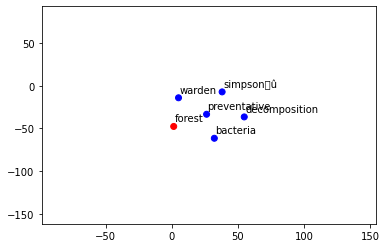

Word most similar to : forest
['decomposition', 'bacteria', 'warden', 'preventative', 'simpson\x89û']


In [ ]:
display_closestwords_tsnescatterplot_perso(model_W2V, tokenize_sentences[0][0])

**L'inconvénient de Word2vec** c'est qu'il apprend le sens d'un mot **uniquement en fonction des mots qui l'entourent**, là où **Keras**  apprend **le sens des mots en fonction de l'objectif** (y_train) fixé lors de l'apprentissage.
 
En fait, *Word2Vec* a une **approche non-supervisée** et *Keras* une **approche supervisée**.

## **Word2Vec Pré-entraîné par Google**

**Une autre approche** consiste à prendre un **Word2Vec déjà entraîné**.

**Google** et **Facebook** propose le leur qui, vous l'imaginait bien, a été **entraîné sur des millions (milliards ?) de données !**

Idéal pour avoir une **représentation générale du vocabulaire d'une langue.**

**À savoir cependant**, les Word2Vec entraînés par Facebook, Google, ou autre **ne peuvent pas être adaptés**, **entraînés sur nos phrases**. On peut seulement **les utiliser en gardant le contexte général** sur lequel ils ont été entraîné.

On télécharge ici le **Word2Vec entraîné par Google** (1.5GB) (disponible sur [ce lien](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) si vous voulez le télécharger en local) :

In [ ]:
!wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=0B7XkCwpI5KDYNlNUTTlSS21pQmM" -O word2vec_pretrained.bin.gz && rm -rf /tmp/cookies.txt


word2vec_pretrained     [               <=>  ]   1.53G   112MB/s    in 13s     


Ensuite on utilise la **bibliothèque** *sh* pour le **dézipper**.

In [ ]:
!pip install sh &> /dev/null

On le **dézip :**

In [ ]:
from sh import gunzip

gunzip('/content/word2vec_pretrained.bin.gz')

Puis on utilise la **fonction** *load_word2vec_format()* de la class *KeyedVectors* pour **charger le Word2vec de Google.**

In [ ]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('/content/word2vec_pretrained.bin', binary=True)  

On peut ensuite **l'utiliser** avec un **modèle de Deep Learning**..
 
Je vous propose ici d'**explorer la représentation du modèle**, les liens qu'il fait entre les mots ...
 
On peut par exemple **regarder les mots similaires** à *'koala'* on obtient *'koalas'*, *'wombat'*, *'quoll'*, *'orang_utan'*, *'Koala'*.

In [ ]:
model.similar_by_word('koala')[:5]

[('koalas', 0.7420616745948792),
 ('wombat', 0.6323026418685913),
 ('quoll', 0.6266179084777832),
 ('orang_utan', 0.6036992073059082),
 ('Koala', 0.5906292200088501)]

Ou **comparer la similarité** entre **deux mots** :

In [ ]:
model.similarity('hotdog', 'hamburger')

0.65520716

Ou encore utiliser **notre fonction** de tout à l'heure pour une **visualisation plus concrète**.

In [ ]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import numpy as np

def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    numb_sim_words = 5

    # get close words
    close_words = model.similar_by_word(word)[:numb_sim_words]
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]

    # color for words
    color = ['red']
    for i in range(numb_sim_words):
      color.append('blue')
     
    # display scatter plot
    plt.scatter(x_coords, y_coords, c = color)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(1, 5), textcoords='offset points')
    plt.xlim(min(x_coords)-100, max(x_coords)+100)
    plt.ylim(min(y_coords)-100, max(y_coords)+100)
    plt.show()

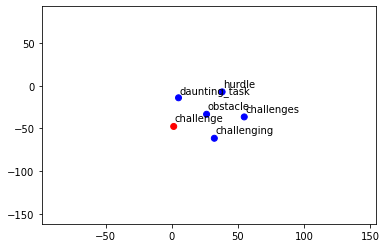

In [ ]:
display_closestwords_tsnescatterplot(model, 'challenge')

Avec ces **connaissances**, vous devriez **avoir les outils en main** pour **entraîner vos propres modèles** de NLP ou **améliorer vos modèles** déjà entraînés.
 
Si vous voulez en savoir plus sur **les modèles NLP de Machine Learning** n'hésitez pas à voir [nos autres articles sur le sujet !](https://inside-machinelearning.com/un-modele-classification-binaire-en-nlp/)